<a href="https://colab.research.google.com/github/BinBinToure/Python/blob/main/%EB%B9%84%ED%8A%B8_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%88%98%EC%A7%91_%EB%B6%84%EC%84%9D_%EC%8B%9C%EA%B0%81%ED%99%94_07_ML%EB%A1%9C_%EA%B0%80%EB%8A%94_%EA%B8%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

경사하강법을 이용한 선형 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
xs = [[2],[4],[9],[5],[3],[6]]    # 특성이 하나로 구성한 독립변수 집합
ys = [8,12,31,15,12,20]           # 종속변수 목록

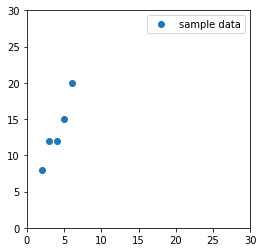

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(xs[:],ys,'o',label="sample data")
plt.xlim(0,30)
plt.ylim(0,30)
plt.legend()
plt.show()

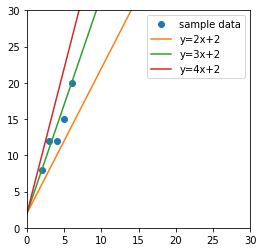

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(xs[:],ys,'o',label="sample data")
plt.plot([0,20],[2,42],label="y=2x+2")
plt.plot([0,20],[2,62],label="y=3x+2")
plt.plot([0,20],[2,82],label="y=4x+2")
plt.xlim(0,30)
plt.ylim(0,30)
plt.legend()
plt.show()

* 손실함수

실제 값과 예측 값의 차이를 손실(오차)라고 한다.

손실함수는 손실을 계산하는 함수로 평균(절대값(예측값 - 실제값)) 방식과

평균((예측값-실제값)*(예측값-실제값)) 방식을 가장 선호한다.

In [ ]:
def mse(yp,y) : #mean squared error
  return np.mean((yp-y)**2)

In [ ]:
nys = np.array(ys)
nysp1 = np.array([ 2*x[0]+2 for x in xs[:]])
nysp2 = np.array([ 3*x[0]+2 for x in xs[:]])
nysp3 = np.array([ 4*x[0]+2 for x in xs[:]])
print(mse(nysp1,nys))
print(mse(nysp2,nys))
print(mse(nysp3,nys))

31.666666666666668
2.1666666666666665
29.666666666666668




*   가중치를 바꿔가면서 mse 계산해보기



In [ ]:
ws = [w10/10 for w10 in range(-30,80)]
b = 2 # 편향은 2로 가정하자
x1 = [x[0] for x in xs]
mses = []
for w in ws :
  yp = np.array([w*x+b for x in x1])
  mses.append(mse(yp,nys))
print(mses)

[1034.1666666666667, 1000.1516666666665, 966.7066666666668, 933.8316666666666, 901.5266666666668, 869.7916666666666, 838.6266666666666, 808.0316666666668, 778.0066666666667, 748.5516666666668, 719.6666666666666, 691.3516666666666, 663.6066666666667, 636.4316666666665, 609.8266666666667, 583.7916666666666, 558.3266666666667, 533.4316666666667, 509.1066666666666, 485.35166666666663, 462.1666666666667, 439.5516666666667, 417.5066666666667, 396.0316666666666, 375.1266666666667, 354.7916666666667, 335.02666666666664, 315.83166666666665, 297.2066666666667, 279.15166666666664, 261.6666666666667, 244.75166666666667, 228.40666666666664, 212.63166666666666, 197.42666666666665, 182.79166666666666, 168.72666666666666, 155.23166666666665, 142.30666666666667, 129.95166666666665, 118.16666666666667, 106.95166666666667, 96.30666666666669, 86.23166666666664, 76.72666666666667, 67.79166666666667, 59.426666666666655, 51.63166666666669, 44.406666666666666, 37.75166666666667, 31.666666666666668, 26.1516666

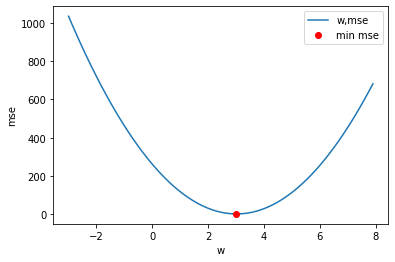

In [ ]:
n_mses = np.array(mses)
mi = np.argmin(n_mses)
plt.plot(ws,mses,label='w,mse')
plt.plot(ws[mi], mses[mi],'ro',label='min mse')
plt.legend()
plt.xlabel('w')
plt.ylabel('mse')
plt.show()

*    dmse/dw와 dmse/db

In [ ]:
def gradient(xs,ys,w,b) :     # 가중치 w일 때 dmse/dw와 편향 b일때 db를 구하는 함수
  yp = w*xs+b     # 예측값
  error = ys - yp
  wd = -2/len(xs)*sum(error*xs)
  bd = -2/len(xs)*sum(error)
  return wd,bd

In [ ]:
xs2 = np.array(xs).reshape(-1)
print(gradient(xs2,nys,3,2))
print(gradient(xs2,nys,4,2))

(-1.0, 0.3333333333333333)
(56.0, 10.0)


In [ ]:
print(gradient(xs2,nys,3.1,1.9))

(3.7333333333333347, 1.1)


* 경사하강법을 이용해서 기울기가 0에 가까운 w와 b를 찾기

In [ ]:
# (경사*lr)만큼 이동하면서 기울기가 0인 지점을 찾는 함수
def gradient_descent(xs,ys,lr=0.001):
  wbhl = [] # 학습 히스토리를 기억하기위한 목록 생성
  wp = np.random.uniform(-1,1) # 초기 w를 -1에서 1사이의 랜덤값으로 지정
  bp = np.random.uniform(-1,1) # 초기 b를 -1에서 1사이의 랜덤값으로 지정
  wbhl.append([wp,bp])

  for i in range(1000) :
    wd,bd = gradient(xs,ys,wp,bp)   # 경사를 구함
    wp = wp - (wd*lr)    # 가중치를 기울기 * 학습률만큼 빼줌
    bp = bp - (bd*lr)  # 가중치를 편향 * 학습률만큼 빼줌
    wbhl.append([wp,bp])
  return wp,bp,wbhl

In [ ]:
wp,bp,whdl = gradient_descent(xs2,nys)
print(wp,bp)
print(gradient(xs2,nys,wp,bp))

3.196605655979803 0.9420699679850649
(-0.02013458529560156, 0.1179946104415587)


In [32]:
yp = np.array([wp*x+bp for x in xs2])
print(mse(yp,nys))

1.8276478589983


In [33]:
for i,(hwp,hbp) in enumerate(wbhl) :
  ypp = np.array([hwp*x+hbp for x in xw2])
  print(f"{i}: wp:{hwp:.2f} bp:{hbp:.2f} mse:{mse(ypp,nys)}")

NameError: ignored

In [34]:
#예측하기
tx = [[3],[7],[12],[15]]
ty = []
for tex in tx:
  ty.append(tex[0]*wp+bp)
print(ty)

[10.531886935924474, 23.318309559843687, 39.3013378397427, 48.891154807682106]


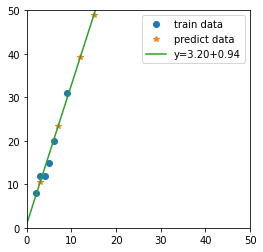

In [38]:
ntx = np.array(tx).reshape(-1)
plt.figure(figsize=(4,4))
plt.plot(xs,ys,'o',label='train data')
plt.plot(ntx,ty,'*',label='predict data')
plt.plot([0,50],[wp*0+bp,wp*50+bp], label=f'y={wp:.2f}+{bp:.2f}')
plt.xlim(0,50)
plt.ylim(0,50)
plt.legend()
plt.show()

In [39]:
for i , (w,b) in enumerate(wbhl) :
  plt.figure(figsize=(4,4))
  

NameError: ignored

In [42]:
from sklearn.datasets import load_boston
data = load_boston()
xs = data['data']
ys = data['target']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [43]:
df = pd.DataFrame(xs)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [44]:
s = pd.Series(ys)
s

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [45]:
columns = data['feature_names']
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [46]:
df = pd.DataFrame(xs)
df.columns = columns
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [47]:
xs = df[['AGE','CRIM','LSTAT','RM']]
xs.head()

,AGE,CRIM,LSTAT,RM
0,65.2,0.00632,4.98,6.575
1,78.9,0.02731,9.14,6.421
2,61.1,0.02729,4.03,7.185
3,45.8,0.03237,2.94,6.998
4,54.2,0.06905,5.33,7.147


In [48]:
s.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [51]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression()    # 모델 생성
model.fit(xs,s)   # 학습해
print(f"{model.coef_},{model.intercept_}") 

[ 0.01259342 -0.10638575 -0.61257821  5.11624558],-2.349101143530042


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(xs,s)

In [56]:
model = LinearRegression()
model.fit(x_train,y_train)
print(f"{model.coef_},{model.intercept_}")

[ 4.01936514e-03 -1.18479546e-01 -6.05295605e-01  4.65685589e+00],0.8996945359886439


In [58]:
yps = model.predict(x_test)
for y,yp in zip(y_train,yps) :
  print(f"{y:2f},{yp:2f}")

14.600000,23.075448
18.900000,31.243097
13.200000,21.641981
12.800000,13.462899
18.700000,20.507841
17.100000,38.455281
24.500000,18.009640
36.400000,12.811435
21.900000,32.914643
32.400000,21.117235
8.300000,20.408357
17.400000,12.632406
14.100000,12.159971
23.300000,30.679362
31.000000,9.382861
25.100000,22.942529
25.000000,36.695461
28.000000,11.537349
50.000000,29.791011
15.600000,18.168644
19.600000,28.396955
22.700000,22.995823
23.200000,24.298691
21.900000,22.730421
20.000000,22.264333
45.400000,31.889055
14.400000,19.271020
23.300000,17.248915
21.200000,37.157558
23.800000,0.687553
19.600000,29.169175
32.000000,23.102198
19.900000,34.882768
20.400000,27.295688
23.600000,21.343025
20.000000,27.573104
21.400000,22.003183
25.000000,27.674123
24.000000,24.335273
22.200000,20.830235
29.600000,20.156992
16.600000,17.176915
21.900000,28.771954
18.200000,18.129663
18.700000,19.527017
33.100000,18.885778
21.200000,19.853625
25.000000,38.999420
50.000000,29.076235
23.100000,19.594974
27.

In [59]:
print(model.score(x_test,y_test))

0.6773785415857903


In [60]:
! pip install ColabTurtlePlus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
from ColabTurtlePlus import Turtle

In [71]:
Turtle.initializeTurtle()
Turtle.setup(width=200,height=200)
Turtle.shape('turtle')

In [72]:
Turtle.speed(1)
Turtle.forward(50)
Turtle.left(45)
Turtle.right(90)
Turtle.left(90)
Turtle.right(90)
Turtle.left(90)
Turtle.right(45)

In [73]:
! pip install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 5.1 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=466579b68413783c7f66fb05bc0f1997b805dfa715a2fe5c86b8cb3c04474ab8
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx


In [74]:
from docx import Document

In [75]:
doc = Document()                          # 문서 개체 생성
doc.add_heading("문서 자동화 테스트")     # 헤더 추가
doc.add_paragraph('안녕하세요.')          # 단락 추가
doc.save('demo.docx')

In [76]:
doc1 = Document()                         
doc1.add_heading("Doc1")    
doc1.save('doc1.docx')
doc2 = Document("doc1.docx")        # 존재하는 파일명으로 문서 개체 생성
doc2.add_paragraph("새로운 단락을 추가")
doc2.save('doc2.docx')    

In [ ]:
doc = Document()
doc.add_paragraph()                 # 빈 단락 추가
doc.add_paragraph('두 번째 단락')   # 단락 추가

normal_style = doc.styles["Normal]"]